In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/spotify_good.csv")

In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [ ]:
ls = ((df.isnull().sum() / 4600) * 100)

In [ ]:
ls

,0
Track,0.000000
Album Name,0.000000
Artist,0.108696
Release Date,0.000000
ISRC,0.000000
All Time Rank,0.000000
Track Score,0.000000
Spotify Streams,2.456522
Spotify Playlist Count,1.521739
Spotify Playlist Reach,1.565217


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
null_percentages = (df.isnull().mean() * 100).astype(int)

In [ ]:
null_percentages

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,2
Spotify Playlist Count,1
Spotify Playlist Reach,1


In [ ]:
def mean_median_imputation(df, col):
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
def knn_imputation(df, cols):
    imputer = KNNImputer(n_neighbors=5)
    df[cols] = imputer.fit_transform(df[cols])

In [ ]:
def predictive_imputation(df, col):
    train_df = df[df[col].notna()]
    test_df = df[df[col].isna()]

In [ ]:
for col in df.columns:
    print(col)
    if null_percentages[col] > 0 and null_percentages[col] <= 10:
        mean_median_imputation(df, col)
    elif null_percentages[col] > 10:
        knn_imputation(df, [col])

Track
Album Name
Artist
Release Date
ISRC
All Time Rank
Track Score
Spotify Streams
Spotify Playlist Count
Spotify Playlist Reach
Spotify Popularity
YouTube Views
YouTube Likes
TikTok Posts
TikTok Likes
TikTok Views
YouTube Playlist Reach
Apple Music Playlist Count
AirPlay Spins
SiriusXM Spins
Deezer Playlist Count
Deezer Playlist Reach
Amazon Playlist Count
Pandora Streams
Pandora Track Stations
Shazam Counts
Explicit Track
Year


In [ ]:
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [ ]:
df['Artist'].fillna(method = 'ffill', inplace = True)

<ipython-input-65-4c23931681e9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Artist'].fillna(method = 'ffill', inplace = True)


In [ ]:
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4600 non-null   float64
 13  TikTok Posts                4600 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_numerical(col):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.show()
    print(df[col].describe())
    print("\n")

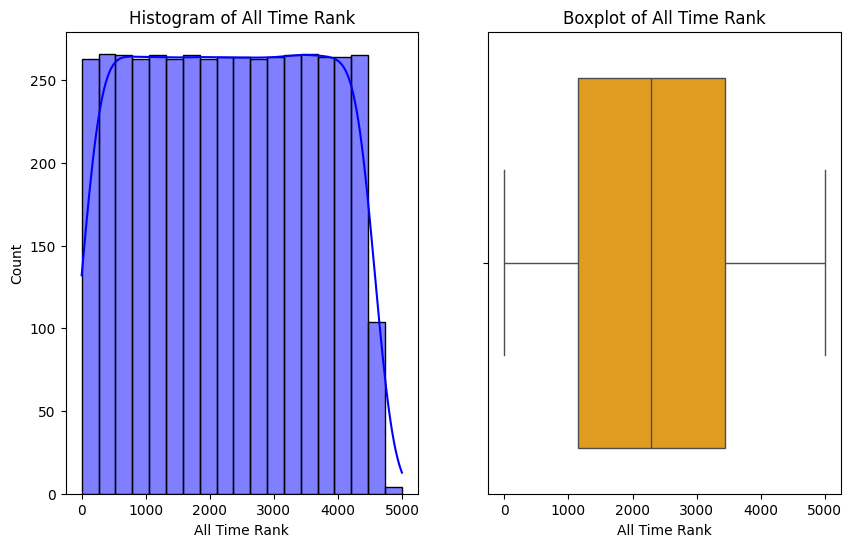

count    4600.000000
mean     2290.678043
std      1322.878312
min         1.000000
25%      1144.750000
50%      2290.500000
75%      3436.250000
max      4998.000000
Name: All Time Rank, dtype: float64




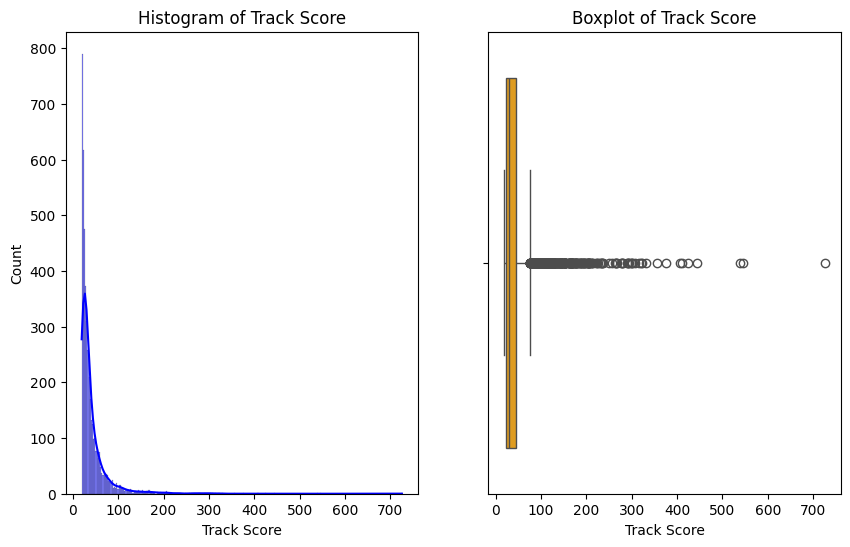

count    4600.000000
mean       41.844043
std        38.543766
min        19.400000
25%        23.300000
50%        29.900000
75%        44.425000
max       725.400000
Name: Track Score, dtype: float64




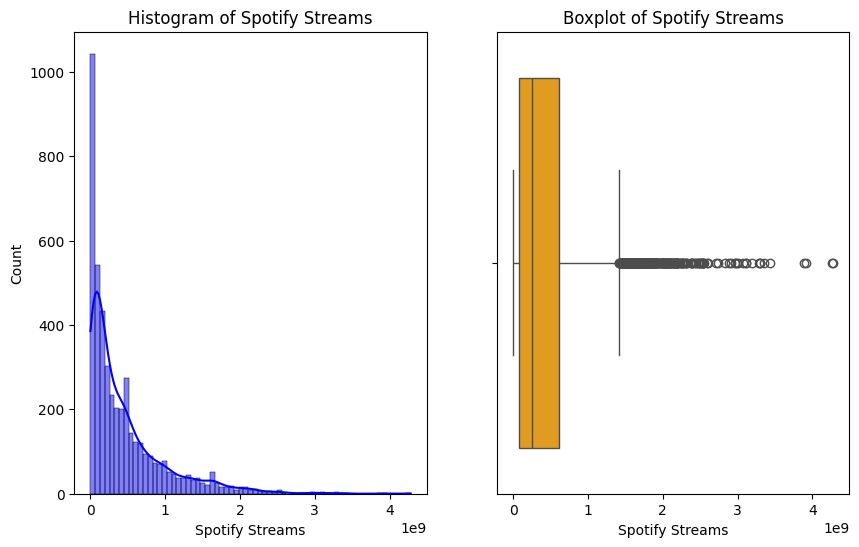

count    4.600000e+03
mean     4.473873e+08
std      5.317878e+08
min      1.071000e+03
25%      7.317922e+07
50%      2.512982e+08
75%      6.113563e+08
max      4.281469e+09
Name: Spotify Streams, dtype: float64




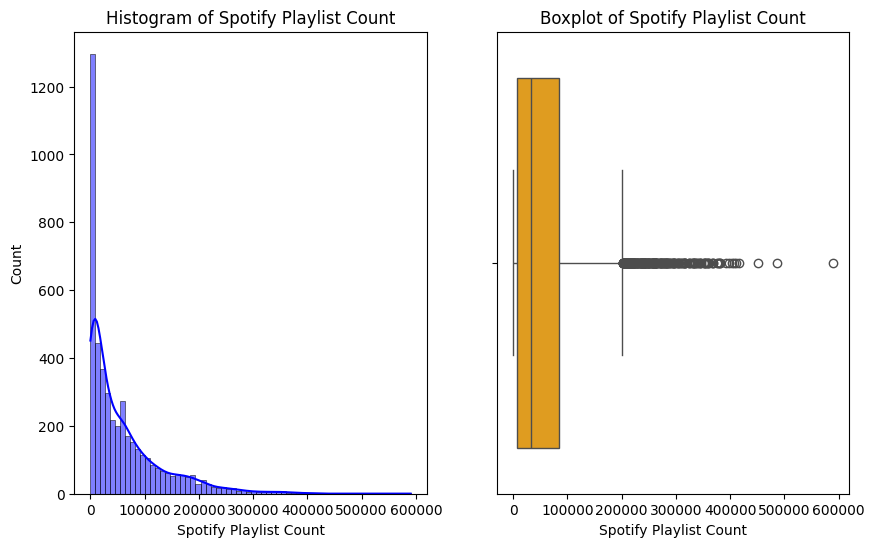

count      4600.000000
mean      59390.829801
std       70587.996018
min           1.000000
25%        7017.750000
50%       33366.000000
75%       84908.250000
max      590392.000000
Name: Spotify Playlist Count, dtype: float64




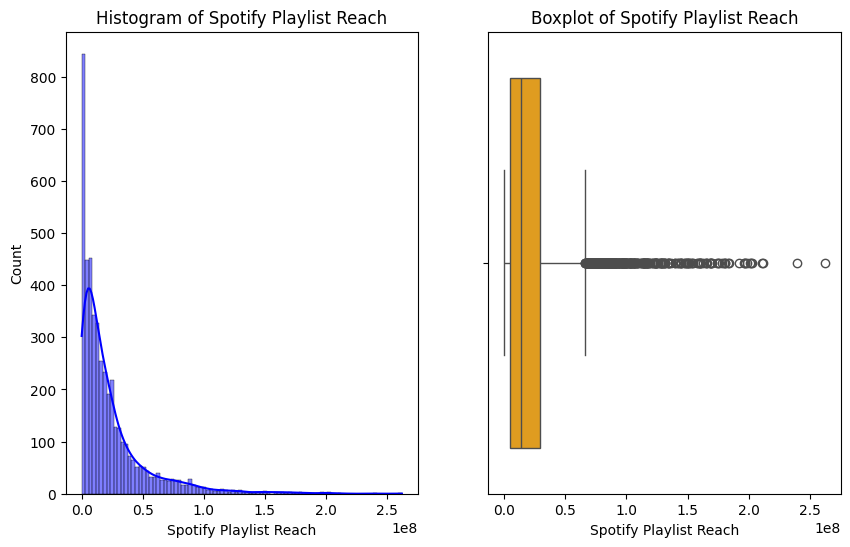

count    4.600000e+03
mean     2.334682e+07
std      2.945387e+07
min      1.000000e+00
25%      4.906956e+06
50%      1.357295e+07
75%      2.930526e+07
max      2.623434e+08
Name: Spotify Playlist Reach, dtype: float64




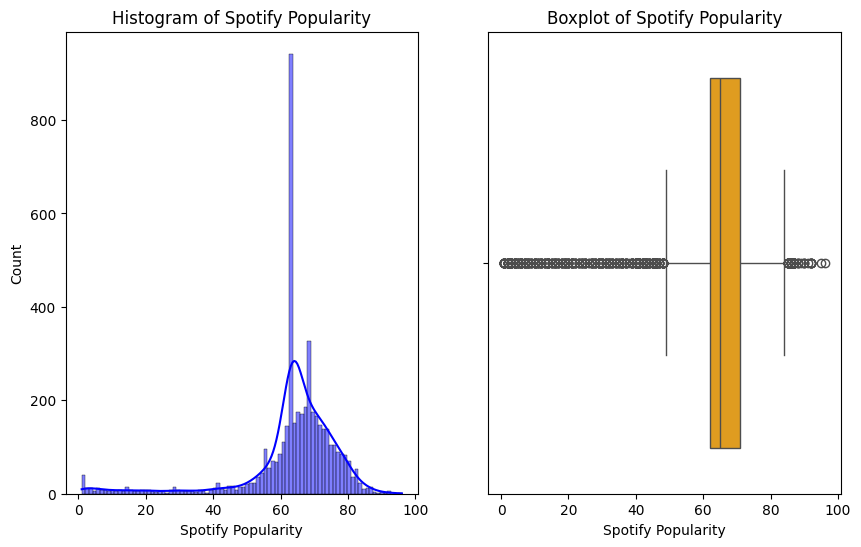

count    4600.000000
mean       63.501581
std        14.703661
min         1.000000
25%        62.000000
50%        65.000000
75%        71.000000
max        96.000000
Name: Spotify Popularity, dtype: float64




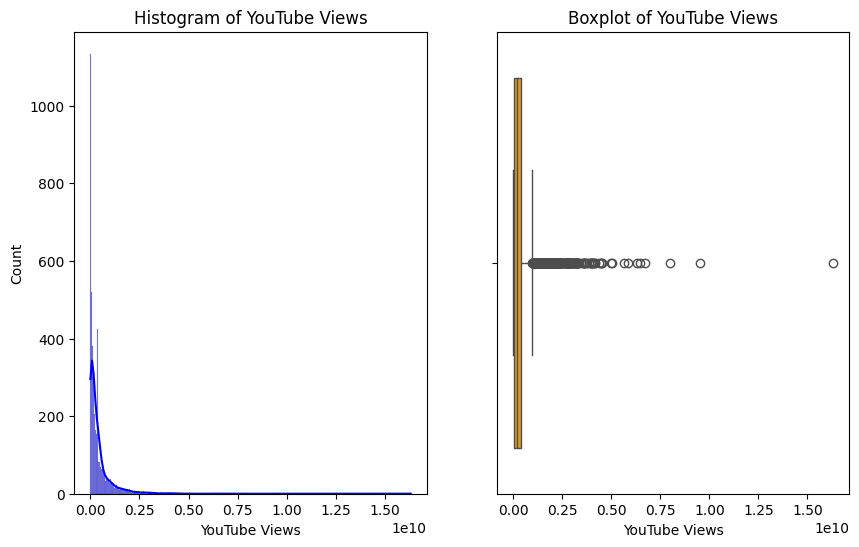

count    4.600000e+03
mean     4.027967e+08
std      6.779892e+08
min      9.130000e+02
25%      4.572019e+07
50%      1.735633e+08
75%      4.204637e+08
max      1.632276e+10
Name: YouTube Views, dtype: float64




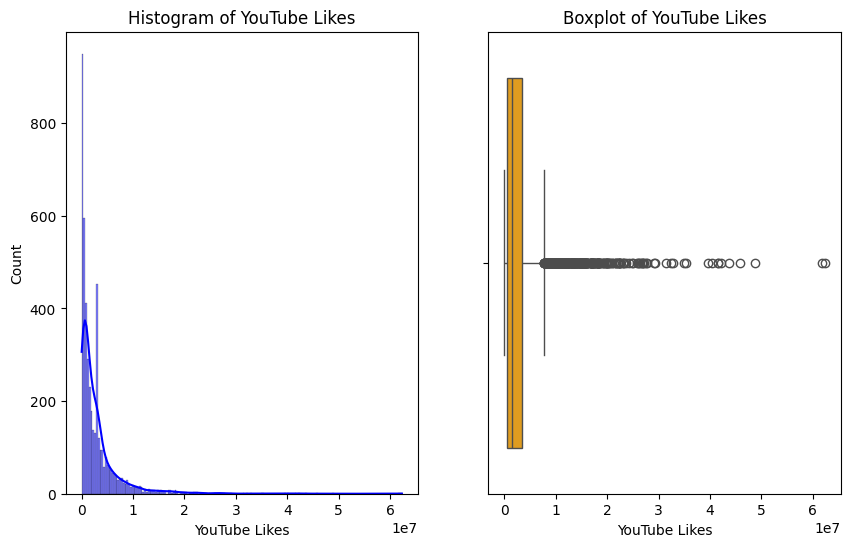

count    4.600000e+03
mean     2.930049e+06
std      4.433534e+06
min      2.500000e+01
25%      4.483708e+05
50%      1.467590e+06
75%      3.354867e+06
max      6.231118e+07
Name: YouTube Likes, dtype: float64




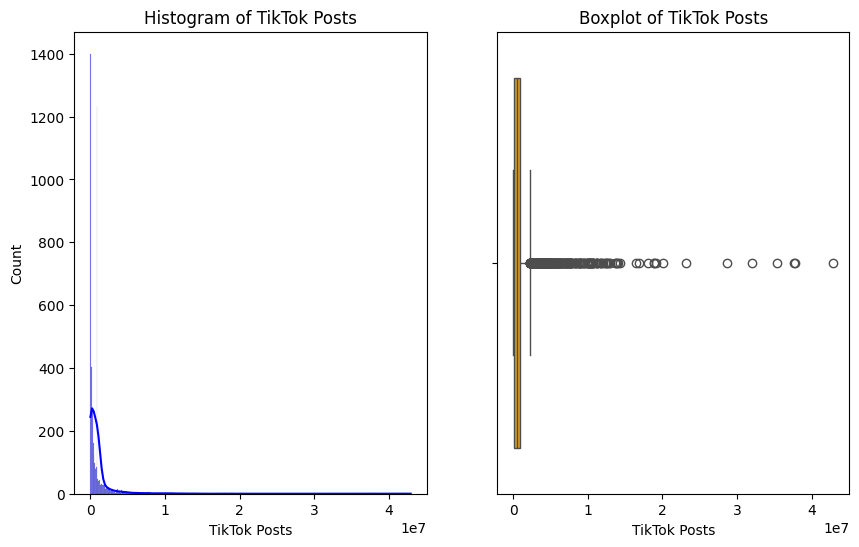

count    4.600000e+03
mean     9.443076e+05
std      2.107763e+06
min      1.000000e+00
25%      6.747500e+04
50%      4.773130e+05
75%      9.443076e+05
max      4.290000e+07
Name: TikTok Posts, dtype: float64




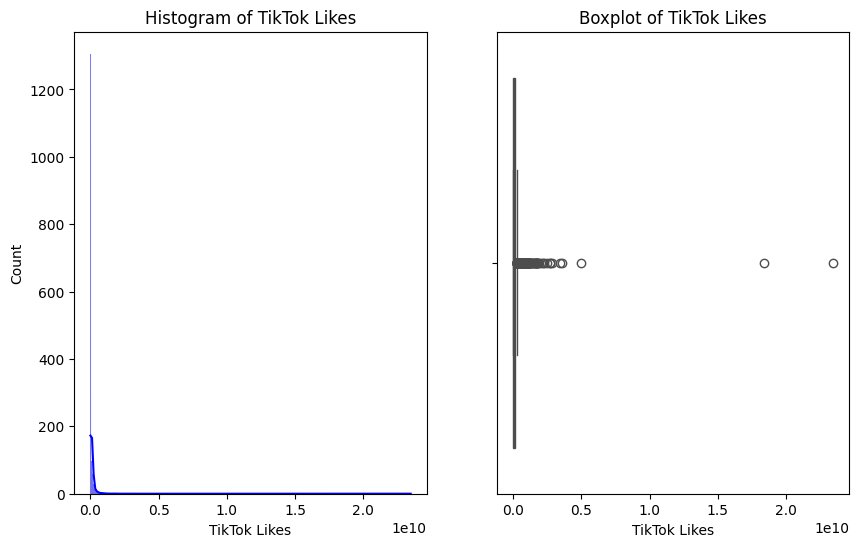

count    4.600000e+03
mean     1.126375e+08
std      4.877273e+08
min      3.000000e+00
25%      9.401191e+06
50%      5.473453e+07
75%      1.126375e+08
max      2.347422e+10
Name: TikTok Likes, dtype: float64




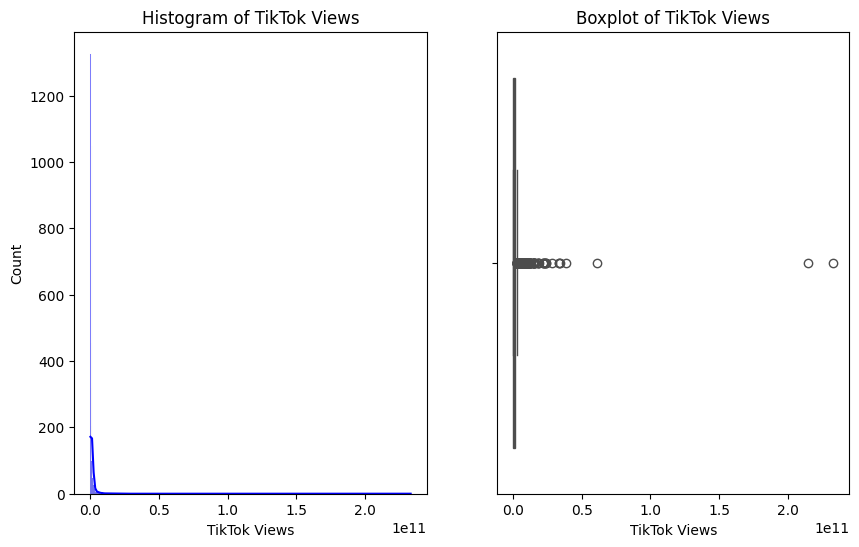

count    4.600000e+03
mean     1.161158e+09
std      5.216712e+09
min      1.900000e+01
25%      9.367173e+07
50%      5.107841e+08
75%      1.161158e+09
max      2.332323e+11
Name: TikTok Views, dtype: float64




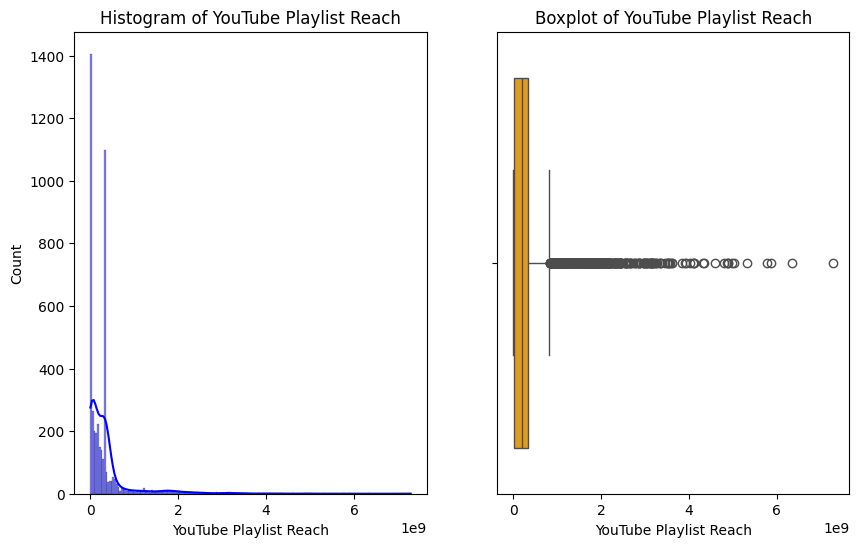

count    4.600000e+03
mean     3.439601e+08
std      5.923823e+08
min      1.000000e+00
25%      2.259004e+07
50%      1.952733e+08
75%      3.439601e+08
max      7.289707e+09
Name: YouTube Playlist Reach, dtype: float64




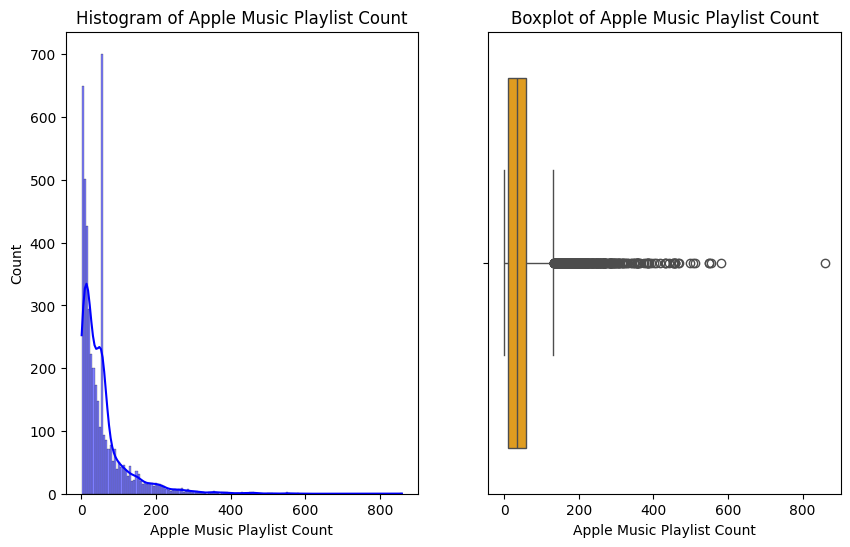

count    4600.00000
mean       54.60312
std        67.10253
min         1.00000
25%        12.00000
50%        36.00000
75%        60.00000
max       859.00000
Name: Apple Music Playlist Count, dtype: float64




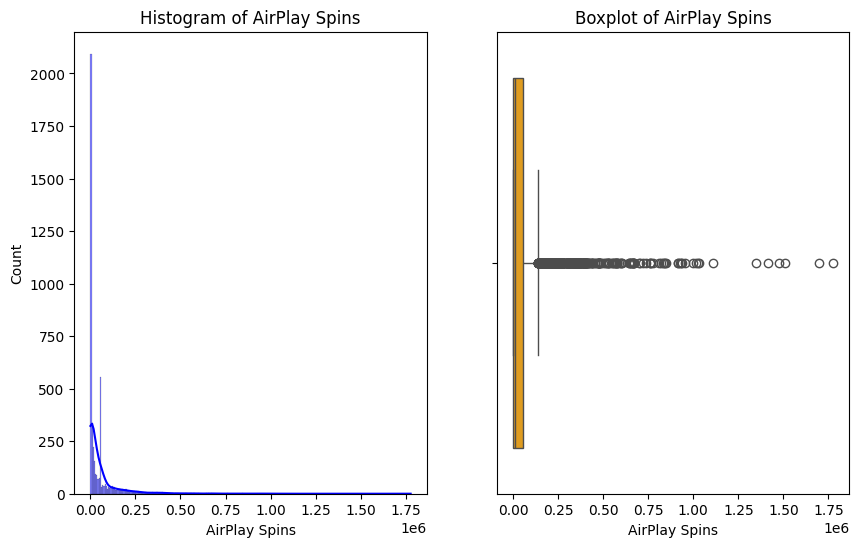

count    4.600000e+03
mean     5.513916e+04
std      1.207936e+05
min      1.000000e+00
25%      7.077500e+02
50%      1.010650e+04
75%      5.513916e+04
max      1.777811e+06
Name: AirPlay Spins, dtype: float64




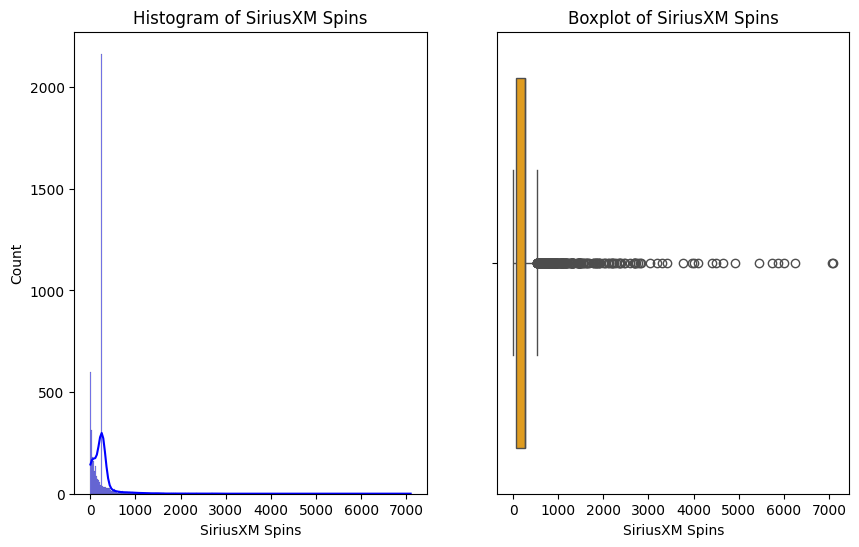

count    4600.000000
mean      257.344368
std       407.034292
min         1.000000
25%        74.000000
50%       257.344368
75%       257.344368
max      7098.000000
Name: SiriusXM Spins, dtype: float64




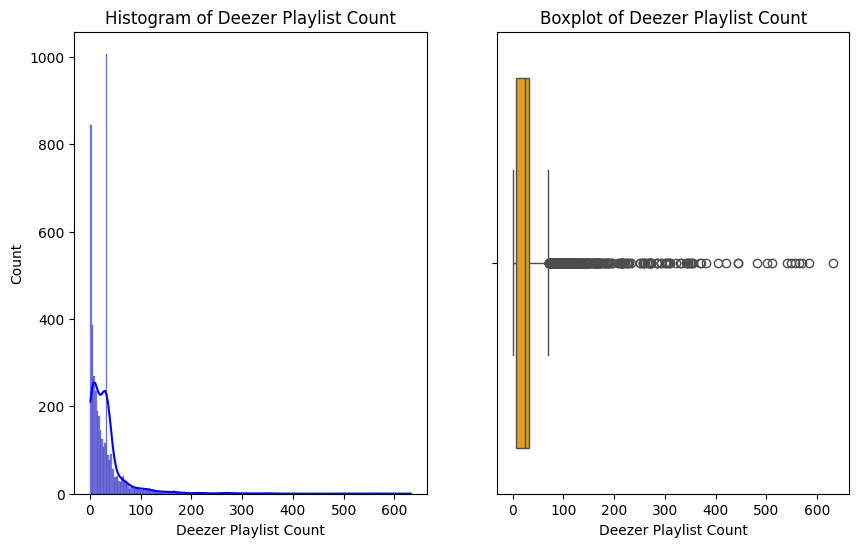

count    4600.000000
mean       32.310954
std        48.536705
min         1.000000
25%         7.000000
50%        24.000000
75%        32.310954
max       632.000000
Name: Deezer Playlist Count, dtype: float64




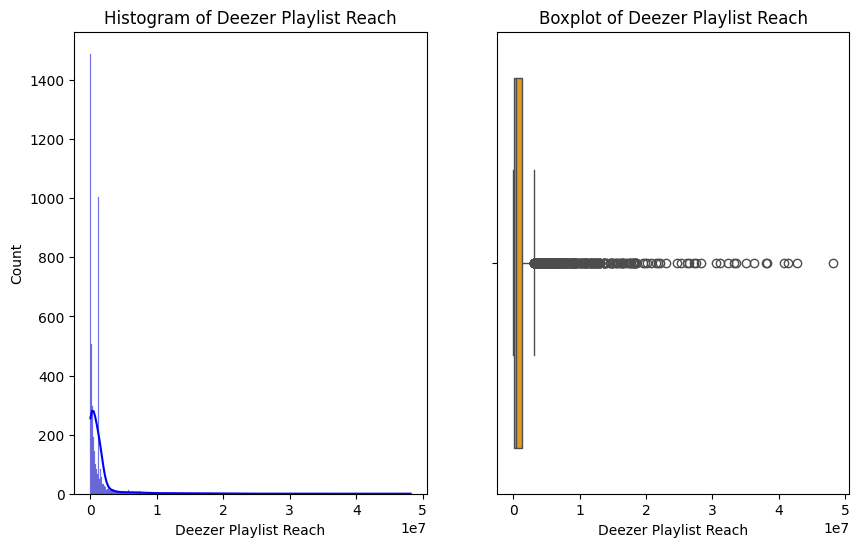

count    4.600000e+03
mean     1.294939e+06
std      3.176628e+06
min      1.000000e+00
25%      8.339675e+04
50%      4.438380e+05
75%      1.294939e+06
max      4.819785e+07
Name: Deezer Playlist Reach, dtype: float64




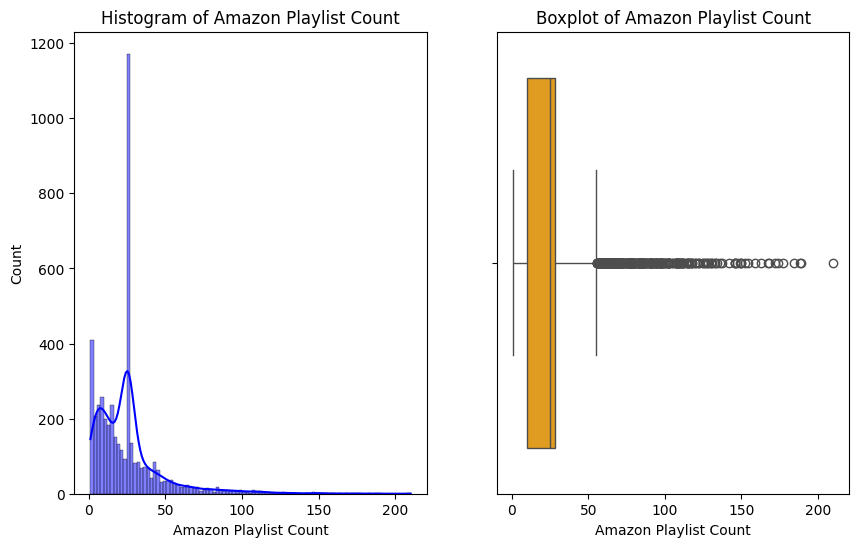

count    4600.000000
mean       25.348942
std        22.814897
min         1.000000
25%        10.000000
50%        25.348942
75%        28.000000
max       210.000000
Name: Amazon Playlist Count, dtype: float64




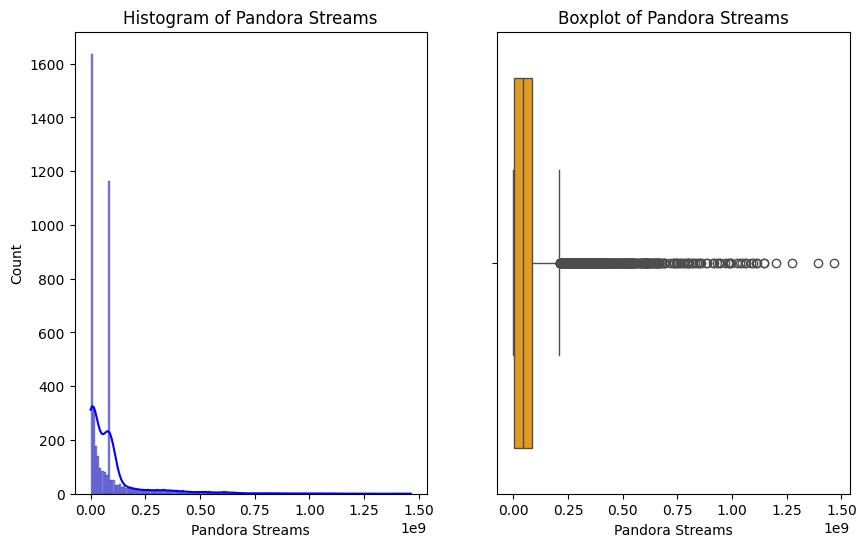

count    4.600000e+03
mean     8.566735e+07
std      1.463062e+08
min      2.000000e+00
25%      2.602399e+06
50%      4.278828e+07
75%      8.566735e+07
max      1.463624e+09
Name: Pandora Streams, dtype: float64




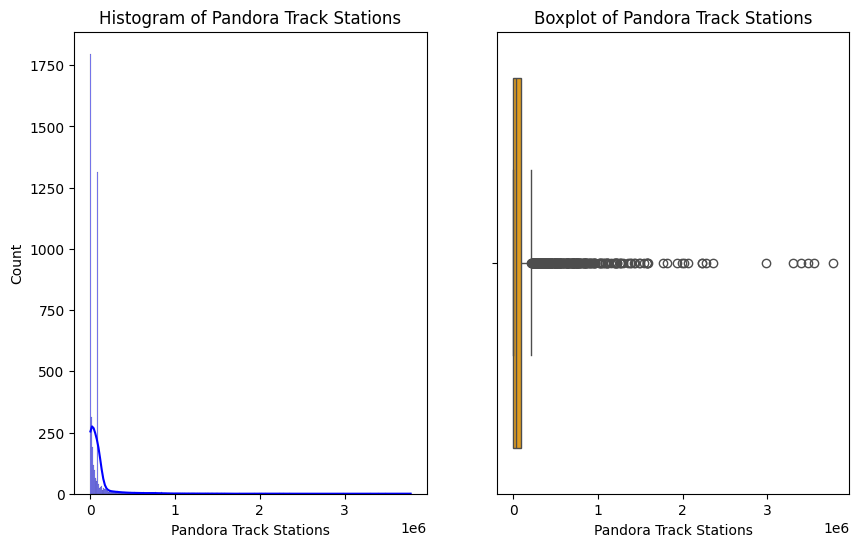

count    4.600000e+03
mean     8.787697e+04
std      2.219998e+05
min      1.000000e+00
25%      2.732000e+03
50%      3.039400e+04
75%      8.787697e+04
max      3.780513e+06
Name: Pandora Track Stations, dtype: float64




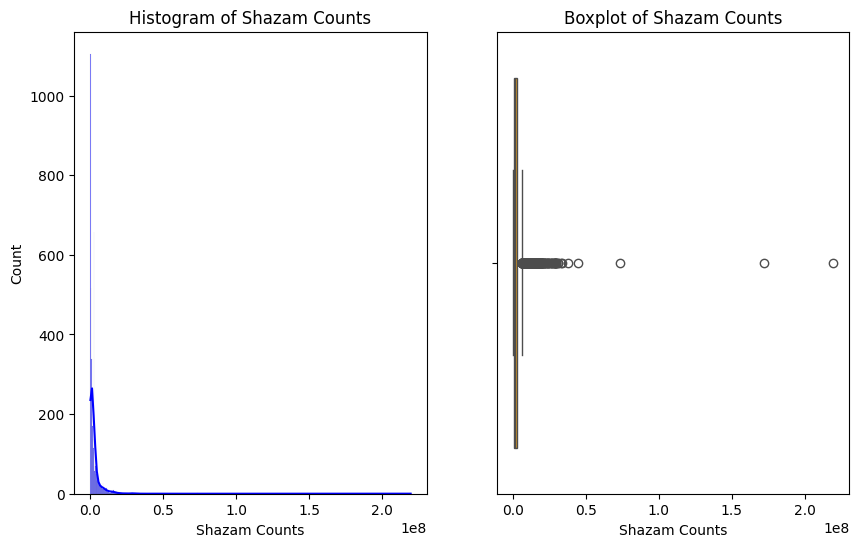

count    4.600000e+03
mean     2.529149e+06
std      5.647275e+06
min      1.000000e+00
25%      2.884815e+05
50%      1.175206e+06
75%      2.529149e+06
max      2.197945e+08
Name: Shazam Counts, dtype: float64




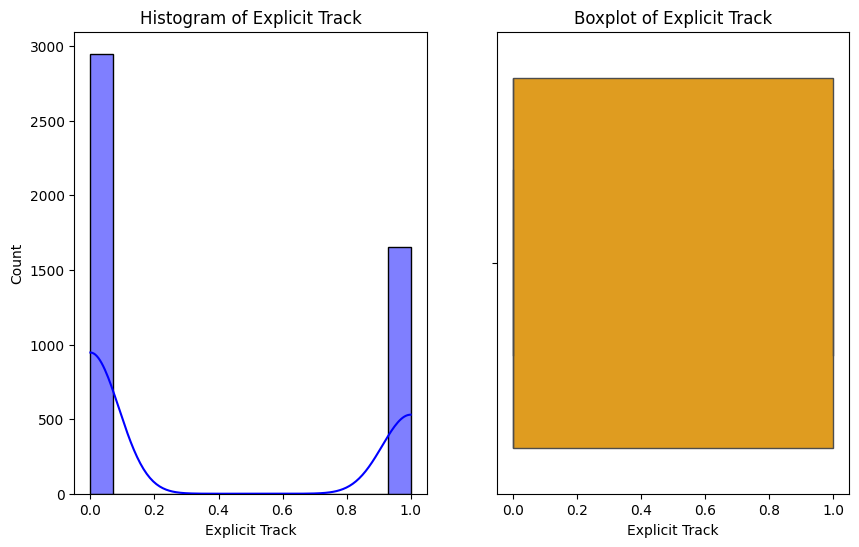

count    4600.000000
mean        0.358913
std         0.479734
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Explicit Track, dtype: float64




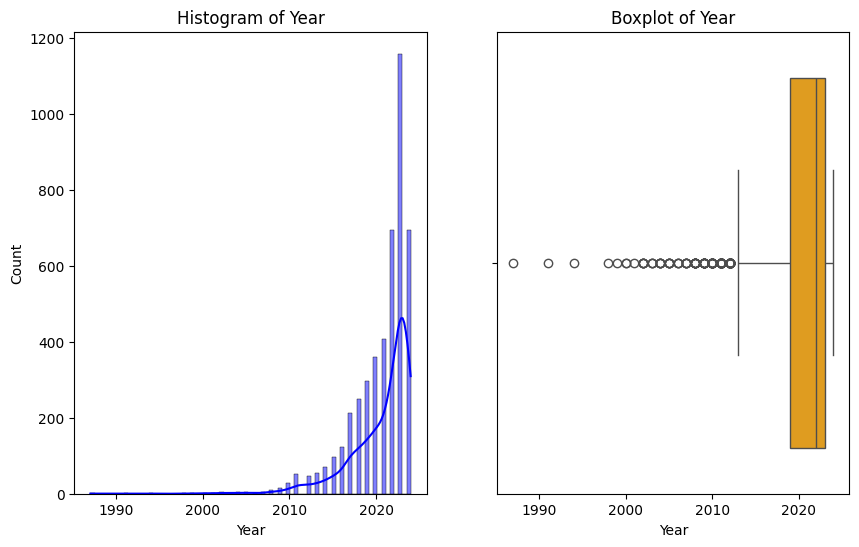

count    4600.000000
mean     2020.616739
std         3.611707
min      1987.000000
25%      2019.000000
50%      2022.000000
75%      2023.000000
max      2024.000000
Name: Year, dtype: float64




In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
for col in numerical_cols:
    analyze_numerical(col)

In [ ]:
cat_cols = df.select_dtypes(include=['object'])
for col in cat_cols:
    print(col)
    print(len(df[col].unique()))

Track
4370
Album Name
4005
Artist
1999
Release Date
1562
ISRC
4598


In [ ]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]
std_dev_values = df.std(numeric_only=True)
variance_values = df.var(numeric_only=True)
skewness_values = df.skew(numeric_only=True)
kurtosis_values = df.kurtosis(numeric_only=True)


print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev_values)
print("\nVariance:\n", variance_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)

Mean:
 All Time Rank                 2.290678e+03
Track Score                   4.184404e+01
Spotify Streams               4.473873e+08
Spotify Playlist Count        5.939083e+04
Spotify Playlist Reach        2.334682e+07
Spotify Popularity            6.350158e+01
YouTube Views                 4.027967e+08
YouTube Likes                 2.930049e+06
TikTok Posts                  9.443076e+05
TikTok Likes                  1.126375e+08
TikTok Views                  1.161158e+09
YouTube Playlist Reach        3.439601e+08
Apple Music Playlist Count    5.460312e+01
AirPlay Spins                 5.513916e+04
SiriusXM Spins                2.573444e+02
Deezer Playlist Count         3.231095e+01
Deezer Playlist Reach         1.294939e+06
Amazon Playlist Count         2.534894e+01
Pandora Streams               8.566735e+07
Pandora Track Stations        8.787697e+04
Shazam Counts                 2.529149e+06
Explicit Track                3.589130e-01
Year                          2.020617e+03
dtyp

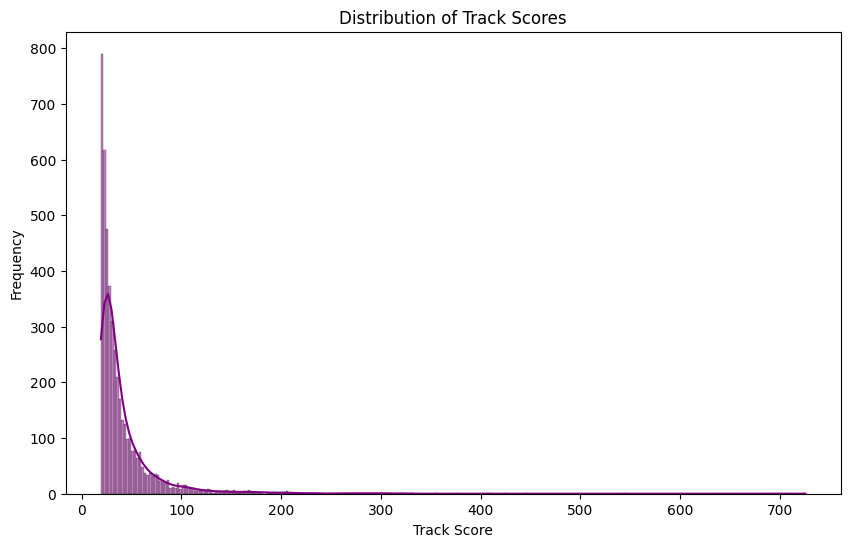

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Score'], kde=True, color='purple')
plt.title('Distribution of Track Scores')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-82-6427e8b36dec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')


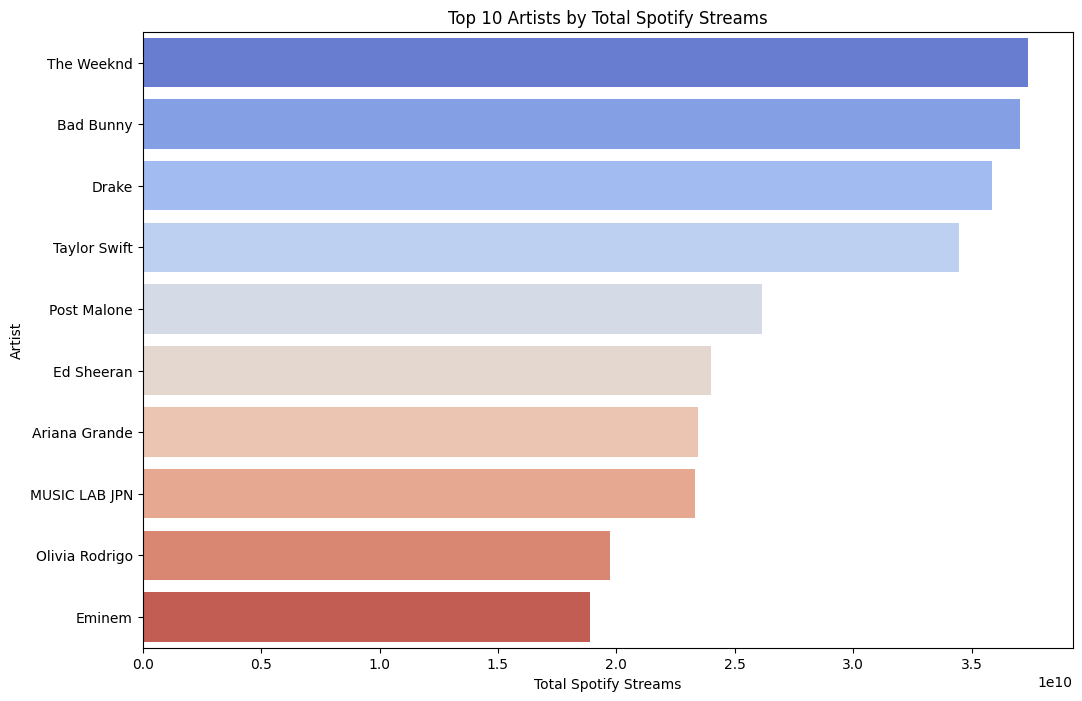

In [ ]:
top_artists = df.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title('Top 10 Artists by Total Spotify Streams')
plt.xlabel('Total Spotify Streams')
plt.ylabel('Artist')
plt.show()

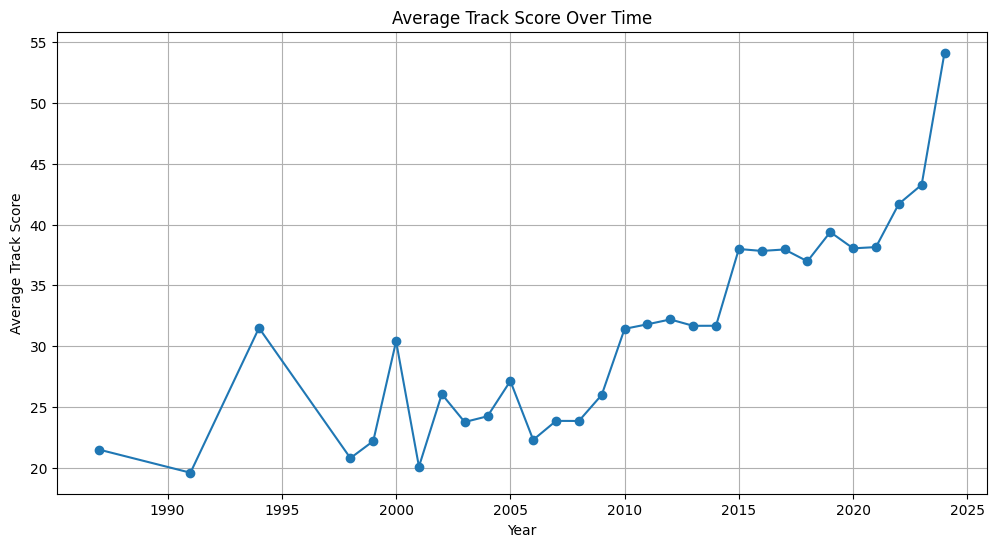

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

score_trend = df.groupby(df['Release Date'].dt.year)['Track Score'].mean()

plt.figure(figsize=(12, 6))
score_trend.plot(marker='o')
plt.title('Average Track Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()

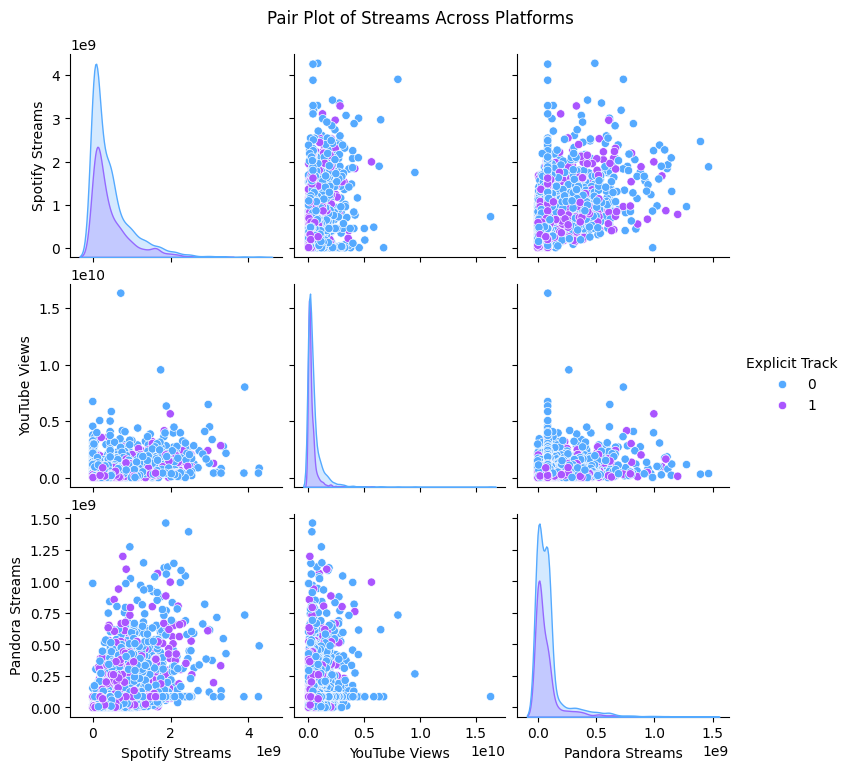

In [ ]:
sns.pairplot(df, vars=['Spotify Streams', 'YouTube Views', 'Pandora Streams'], hue='Explicit Track', palette='cool')
plt.suptitle('Pair Plot of Streams Across Platforms', y=1.02)
plt.show()

<ipython-input-86-24e8c11aa453>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Popularity', y='Track', data=top_tracks, palette='magma')


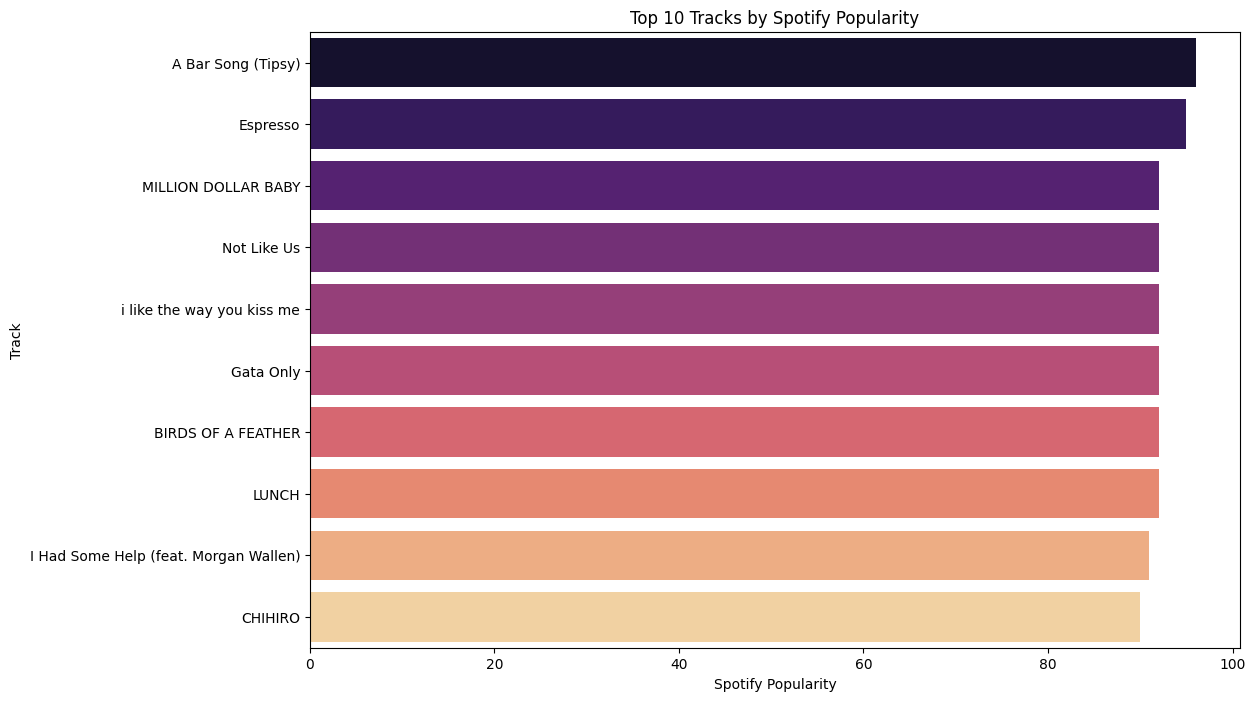

In [ ]:
top_tracks = df[['Track', 'Spotify Popularity']].sort_values(by='Spotify Popularity', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Popularity', y='Track', data=top_tracks, palette='magma')
plt.title('Top 10 Tracks by Spotify Popularity')
plt.xlabel('Spotify Popularity')
plt.ylabel('Track')
plt.show()

In [ ]:
df.Artist.value_counts()

,count
Artist,
Drake,64
Taylor Swift,63
Bad Bunny,60
KAROL G,32
The Weeknd,31
...,...
Carrier,1
Javed Ali,1
The King Khan & BBQ Show,1


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


top_Artist = df.Artist.value_counts().head(10)
fig = px.pie(top_Artist, names=top_Artist.index, values=top_Artist.values,
             title="MOst song releaser Artist with most popylarity")
fig.show()

NameError: name 'df' is not defined

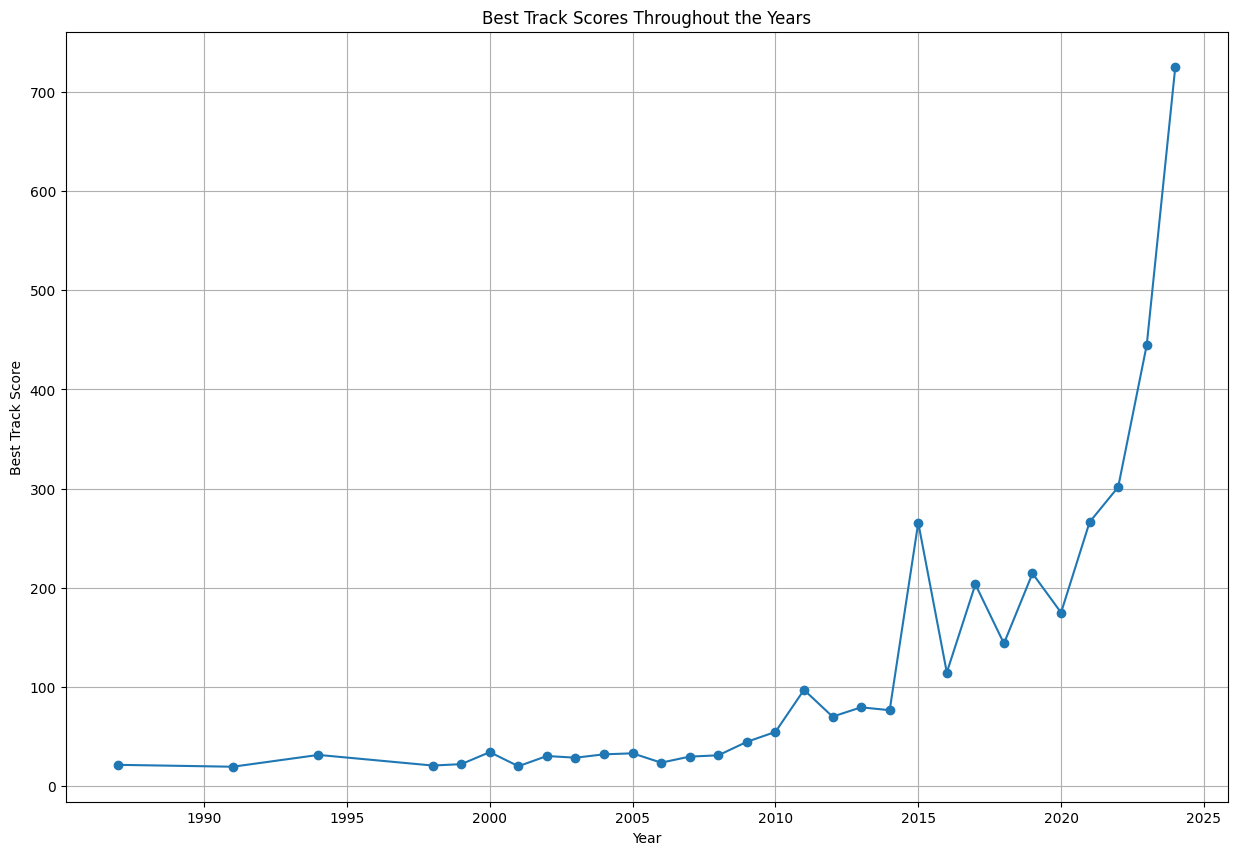

In [ ]:
best_track_score_per_year = df.groupby('Year')['Track Score'].max()

plt.figure(figsize=(15, 10))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()

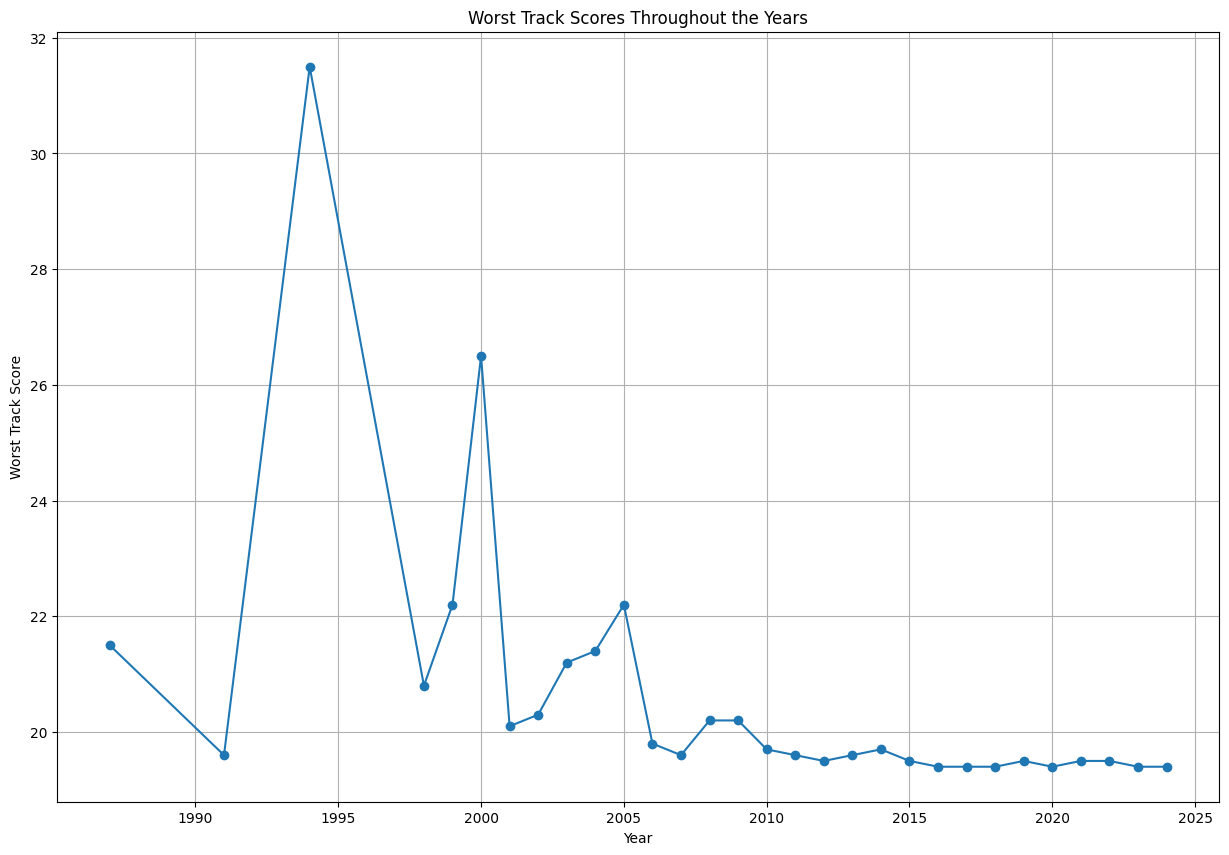

In [ ]:
worst_track_score_per_year = df.groupby('Year')['Track Score'].min()

plt.figure(figsize=(15, 10))
worst_track_score_per_year.plot(kind='line', marker='o')
plt.title('Worst Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)
plt.show()

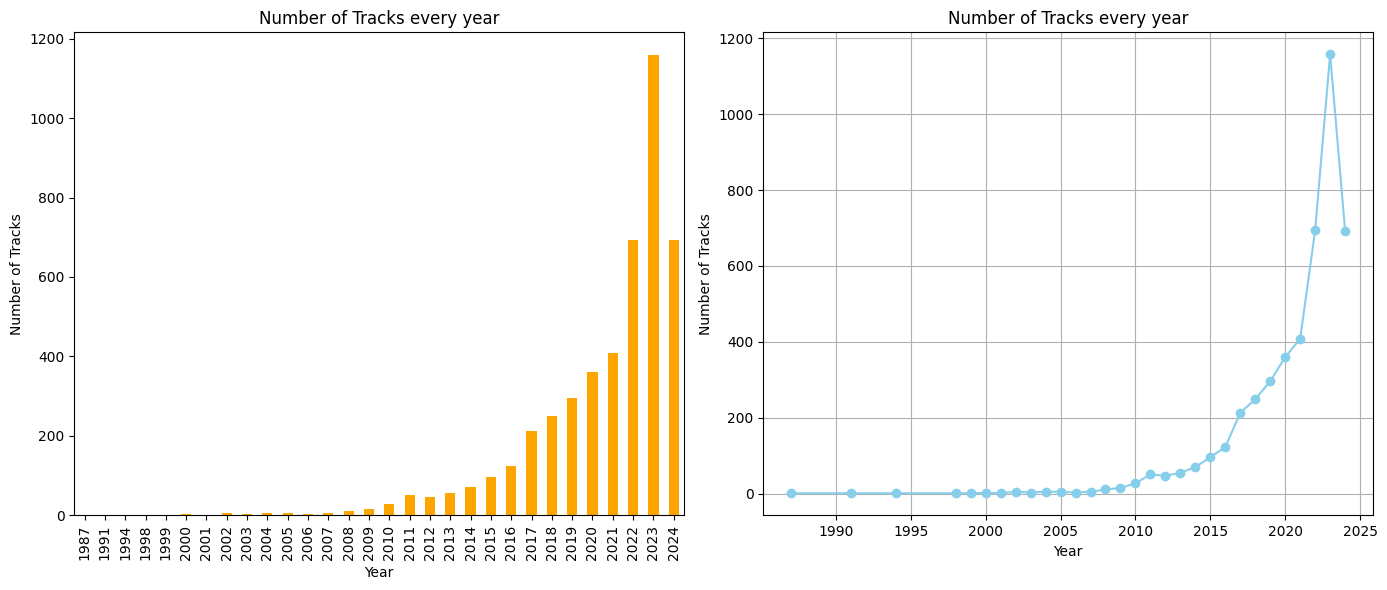

In [ ]:
tracks_per_year = df.groupby('Year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
tracks_per_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Number of Tracks every year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

# Line Chart
tracks_per_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Number of Tracks every year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()

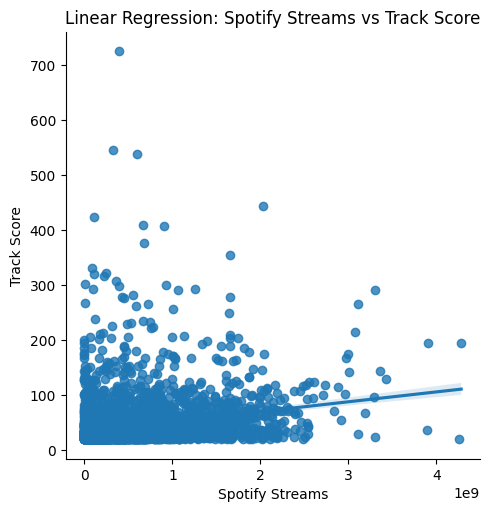

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Relationship between Spotify Streams and Track Score
sns.lmplot(x='Spotify Streams', y='Track Score', data=df)
plt.title('Linear Regression: Spotify Streams vs Track Score')
plt.show()

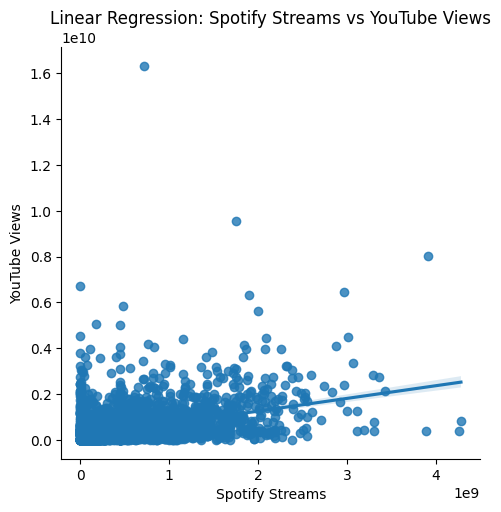

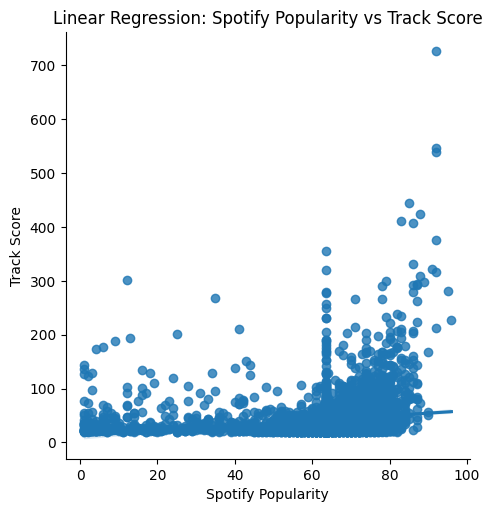

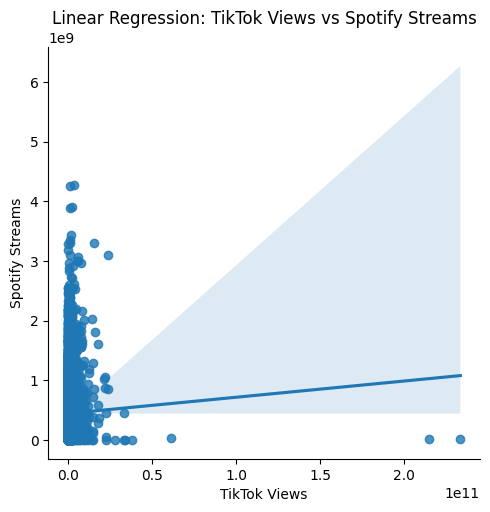

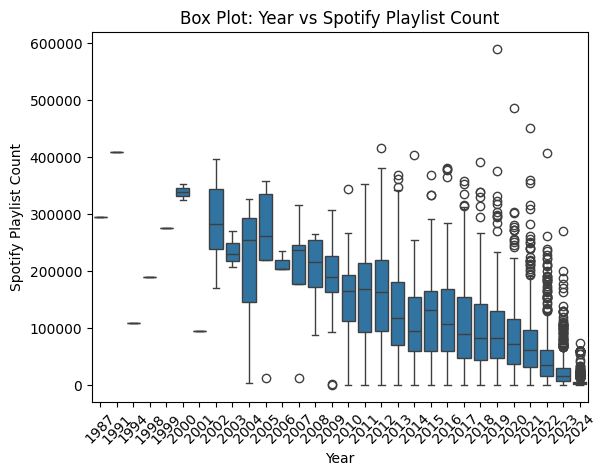

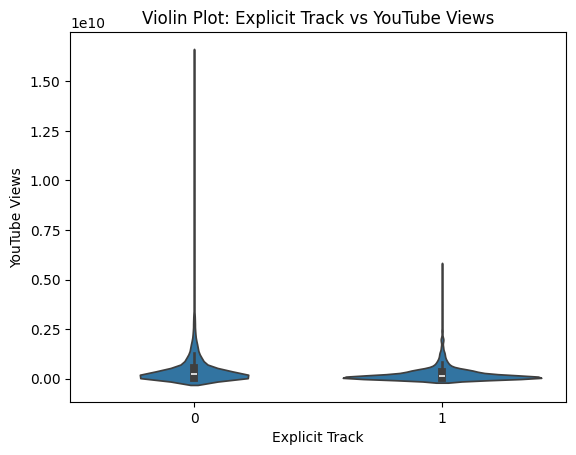

In [ ]:

sns.lmplot(x='Spotify Streams', y='YouTube Views', data=df)
plt.title('Linear Regression: Spotify Streams vs YouTube Views')
plt.show()

sns.lmplot(x='Spotify Popularity', y='Track Score', data=df)
plt.title('Linear Regression: Spotify Popularity vs Track Score')
plt.show()

sns.lmplot(x='TikTok Views', y='Spotify Streams', data=df)
plt.title('Linear Regression: TikTok Views vs Spotify Streams')
plt.show()

sns.boxplot(x='Year', y='Spotify Playlist Count', data=df)
plt.title('Box Plot: Year vs Spotify Playlist Count')
plt.xticks(rotation=45)
plt.show()

sns.violinplot(x='Explicit Track', y='YouTube Views', data=df)
plt.title('Violin Plot: Explicit Track vs YouTube Views')
plt.show()

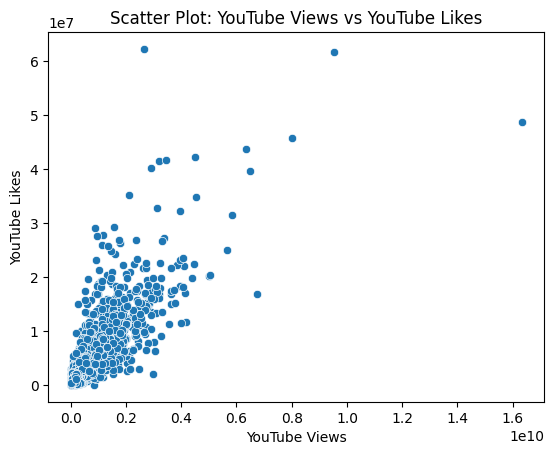

In [ ]:
sns.scatterplot(x='YouTube Views', y='YouTube Likes', data=df)
# sns.lineplot(x='YouTube Views', y='YouTube Likes', data=df, color='red')
plt.title('Scatter Plot: YouTube Views vs YouTube Likes')
plt.show()

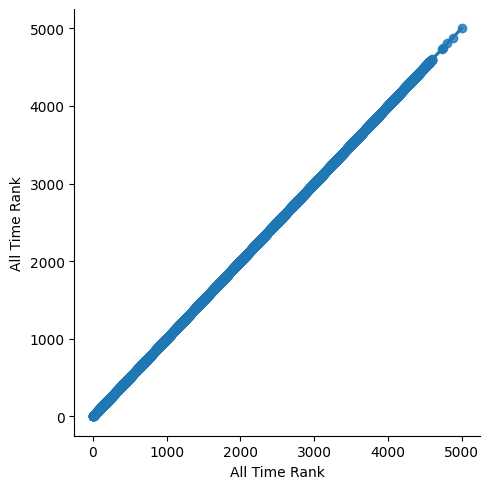

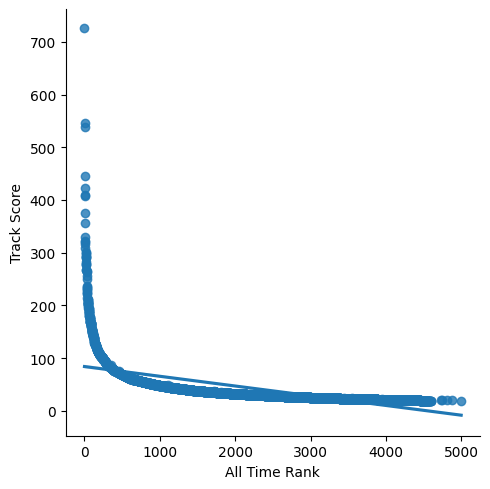

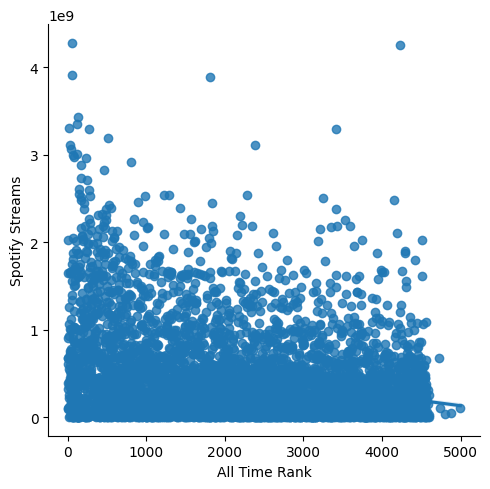

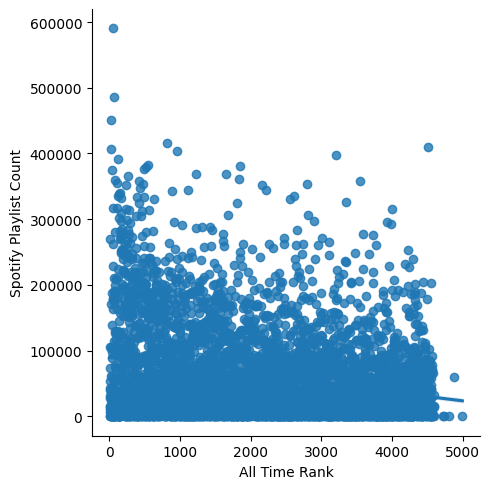

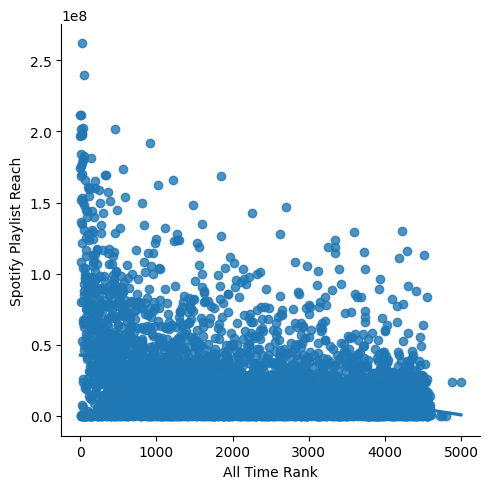

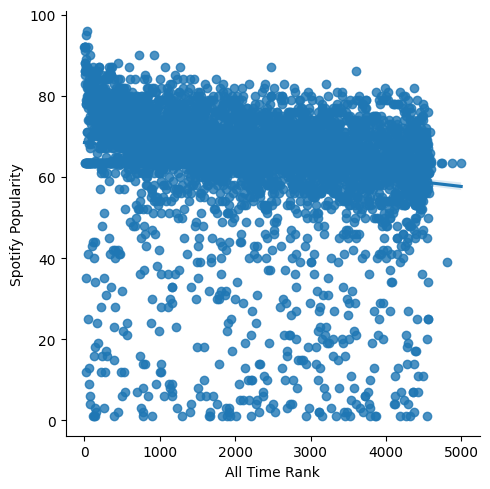

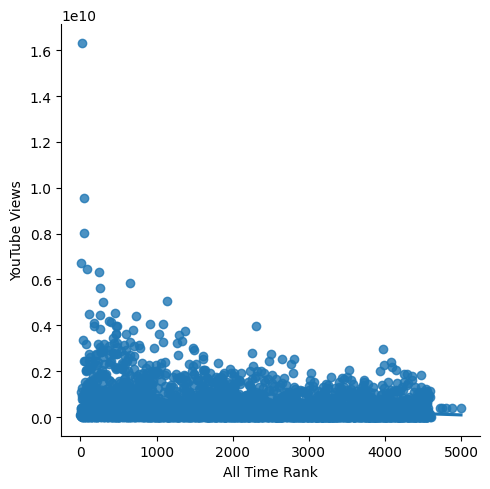

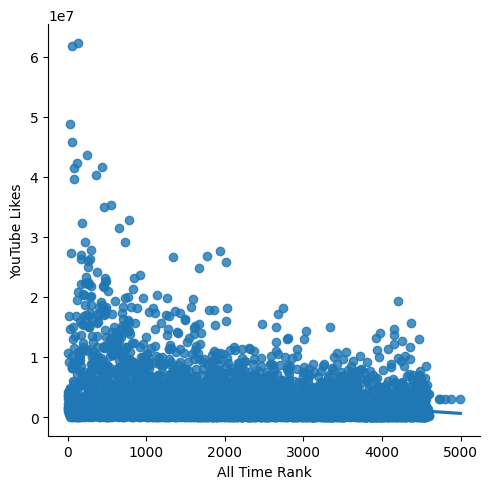

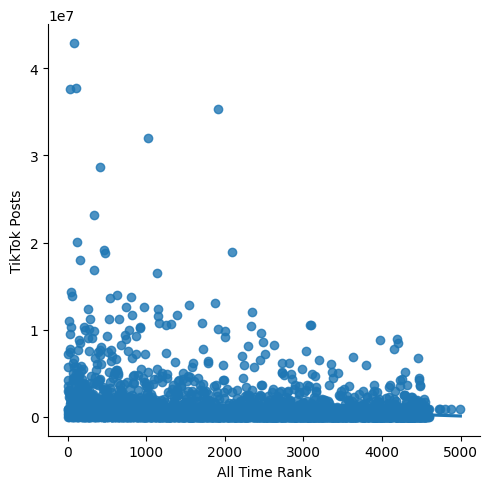

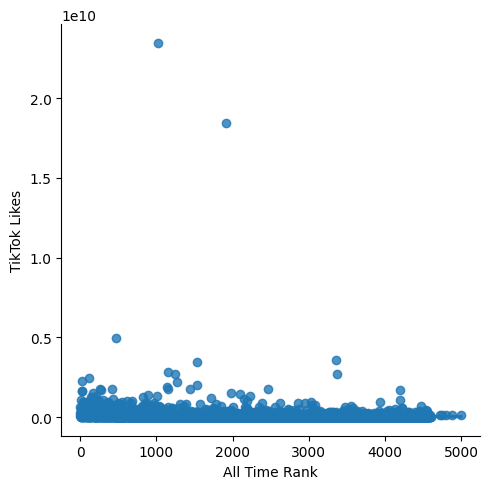

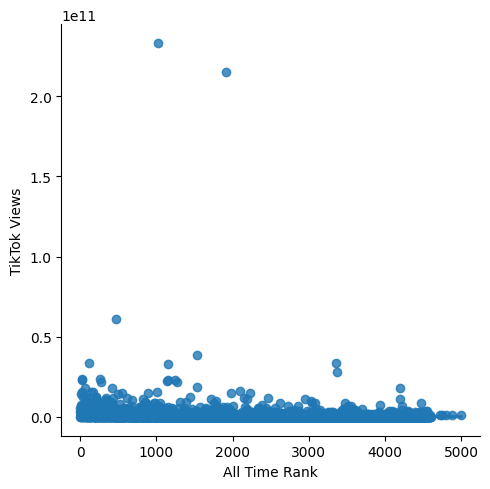

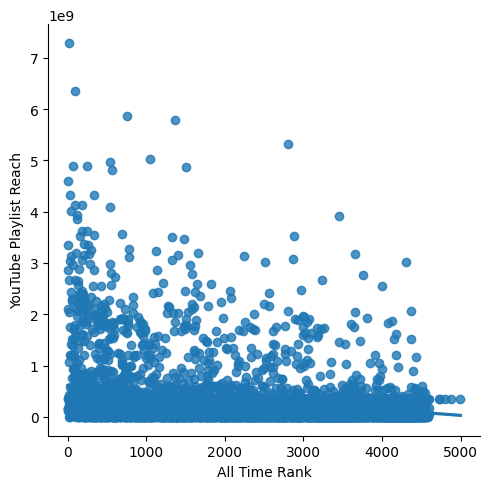

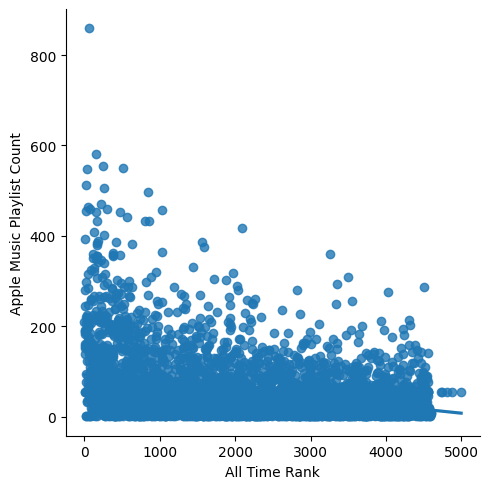

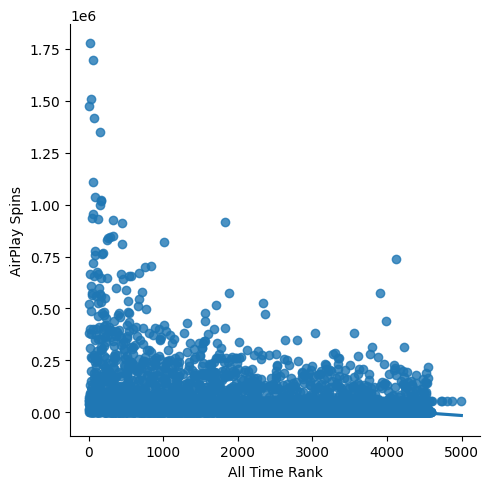

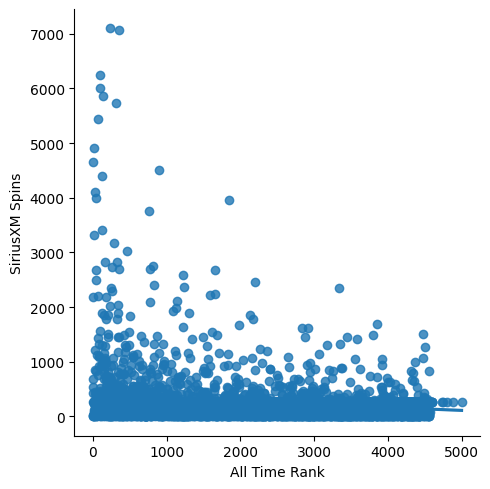

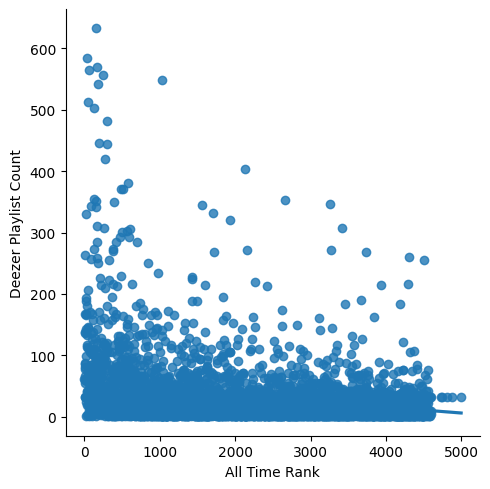

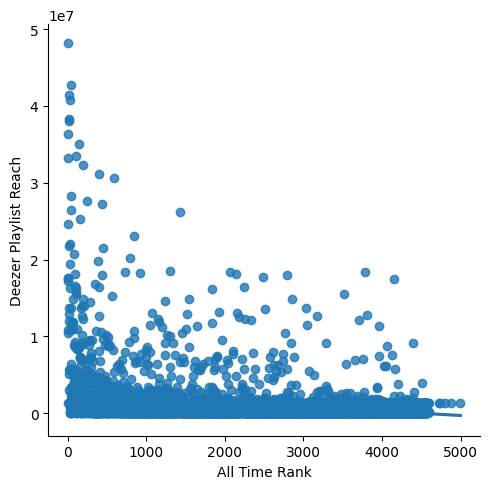

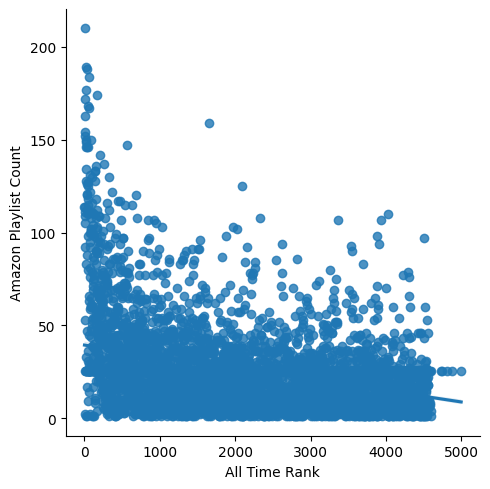

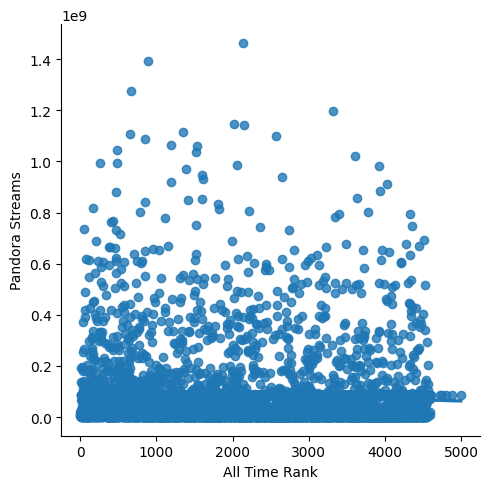

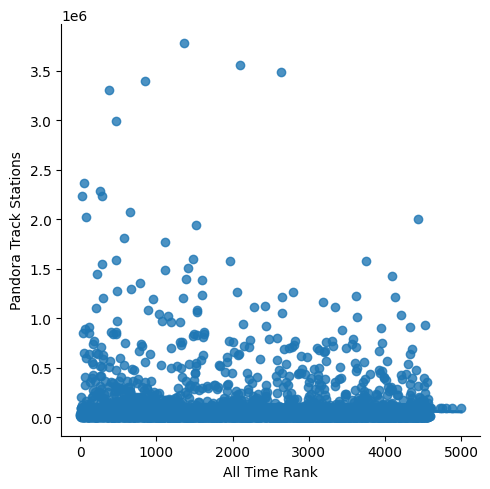

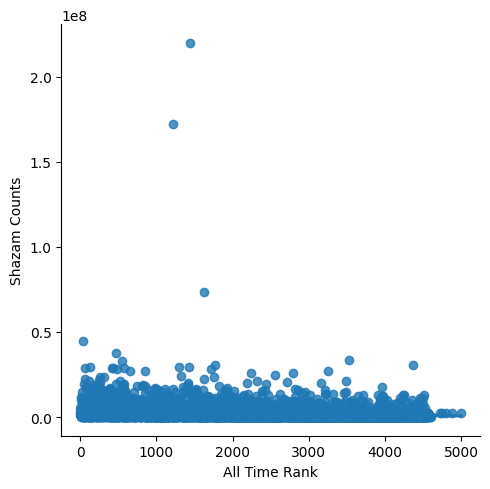

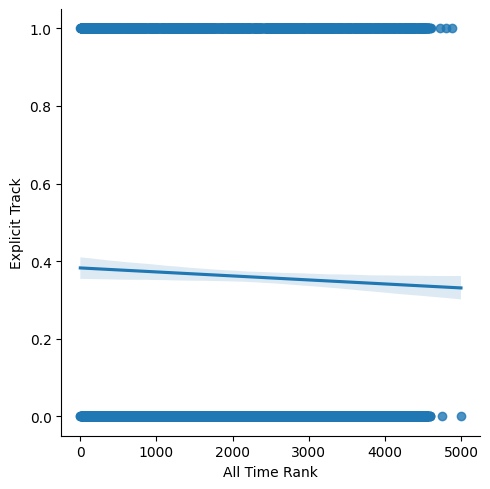

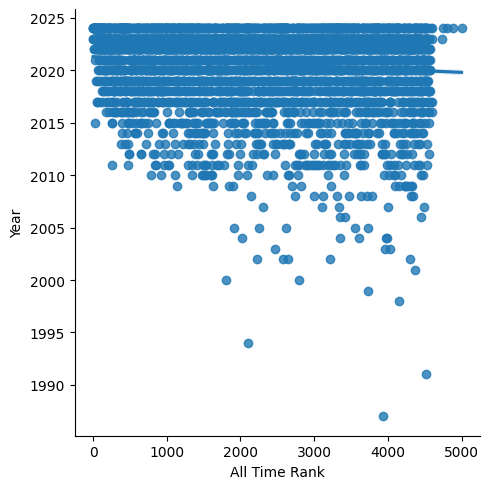

In [ ]:
for col in numerical_cols:
    sns.lmplot(x="All Time Rank", y=col, data=df)
    plt.show()